# Programmieraufgaben zu 3.2 (Hierarchical Clustering)

---

## Programmieraufgabe 

Sei ein Datensatz $E$ gegeben durch

$$
E=\{(7.1, 1.5), (5, 14.6), (9.7, 8.1), (14, 4.6), (15.5, 2.2), (18.4, 6.2), (20.3, 10.3)\}
$$

Nutzen Sie Python und scikit-learn, um die folgenden Aufgaben zu bearbeiten.

**Aufgaben**:

1. Wählen Sie $k=2$ und wenden Sie das agglomerative Clustering mit Single-Link an. Geben Sie die Clusterzugehörigkeiten aller Punkte an.
2. Wählen Sie $k=3$ und wenden Sie das agglomerative Clustering mit Single-Link an. Geben Sie die Clusterzugehörigkeiten aller Punkte an.
3. Lassen Sie sich ein durch agglomeratives Clustering bestimmtes Dendrogramm bzgl. $E$ anzeigen.

In [7]:
from sklearn.cluster import AgglomerativeClustering

E = [
    (7.1, 1.5),
    (5, 14.6),
    (9.7, 8.1),
    (14, 4.6),
    (15.5, 2.2),
    (18.4, 6.2),
    (20.3, 10.3),
]

print("------- Aufgabe 1 -------")
cluster_2 = AgglomerativeClustering(n_clusters=2).fit_predict(E)
print(f"Cluster bei k=2: {cluster_2}")

print()
print("------- Aufgabe 2 -------")
cluster_3 = AgglomerativeClustering(n_clusters=3).fit_predict(E)
print(f"Cluster bei k=3: {cluster_3}")

------- Aufgabe 1 -------
Cluster bei k=2: [0 1 0 0 0 0 0]

------- Aufgabe 2 -------
Cluster bei k=3: [0 1 0 0 0 2 2]


------- Aufgabe 3 -------


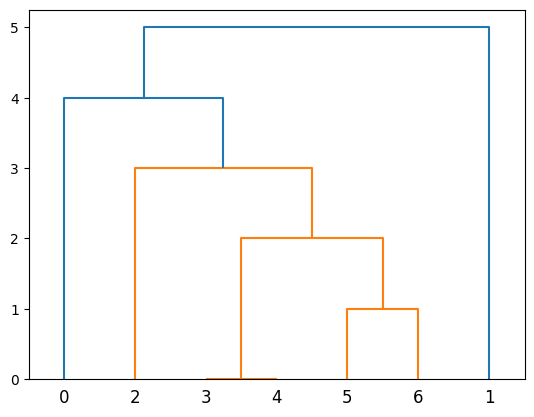

In [9]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distance = np.arange(model.children_.shape[0])

    linkage_matrix = np.column_stack([model.children_, distance, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


print("------- Aufgabe 3 -------")

model = AgglomerativeClustering(n_clusters=5, linkage="single").fit(E)
plot_dendrogram(model)